In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astroduet.config import Telescope
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
import glob
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [15,8]
plotcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
duet = Telescope(config='minimum_mass')

In [4]:
res_hdu = fits.open('../astroduet/data/run060719_detection-results.fits')
res = res_hdu[1].data
lims_hdu = fits.open('../astroduet/data/run060719_detection-limits.fits')
lims = lims_hdu[1].data
res_hdu.close()
lims_hdu.close()

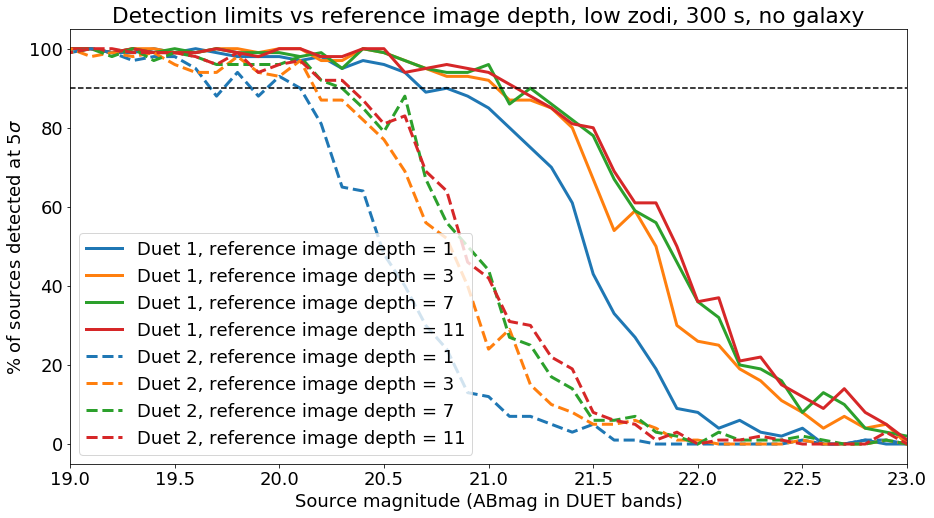

In [6]:
for i, refdepth in enumerate([1,3,7,11]):
    ind = ((res['ref_depth']== refdepth) & (res['band'] == 1) & (res['stack']==1) & (res['zodi'] == 'low') & (res['gal'] == 'none'))
    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle='-', 
             color=plotcolors[i], label='Duet 1, reference image depth = '+str(refdepth))
for i, refdepth in enumerate([1,3,7,11]):
    ind = ((res['ref_depth']== refdepth) & (res['band'] == 2) & (res['stack']==1) & (res['zodi'] == 'low') & (res['gal'] == 'none'))
    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle='--', 
             color=plotcolors[i], label='Duet 2, reference image depth = '+str(refdepth))
#for i, refdepth in enumerate([1,3,7,11]):
#    ind = ((res['ref_depth']== refdepth) & (res['band'] == 3) & (res['stack']==1) & (res['zodi'] == 'low') & (res['gal'] == 'none'))
#    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle=':', 
#             color=plotcolors[i], label='Combined, reference image depth = '+str(refdepth))
   
plt.axhline(y=90, xmin=0, xmax=1, linestyle='--', color='black', linewidth=1.5)
plt.legend()
plt.xlim(19, 23)
plt.xlabel('Source magnitude (ABmag in DUET bands)')
plt.ylabel(r'% of sources detected at 5$\sigma$')
plt.title('Detection limits vs reference image depth, low zodi, 300 s, no galaxy')
plt.show()

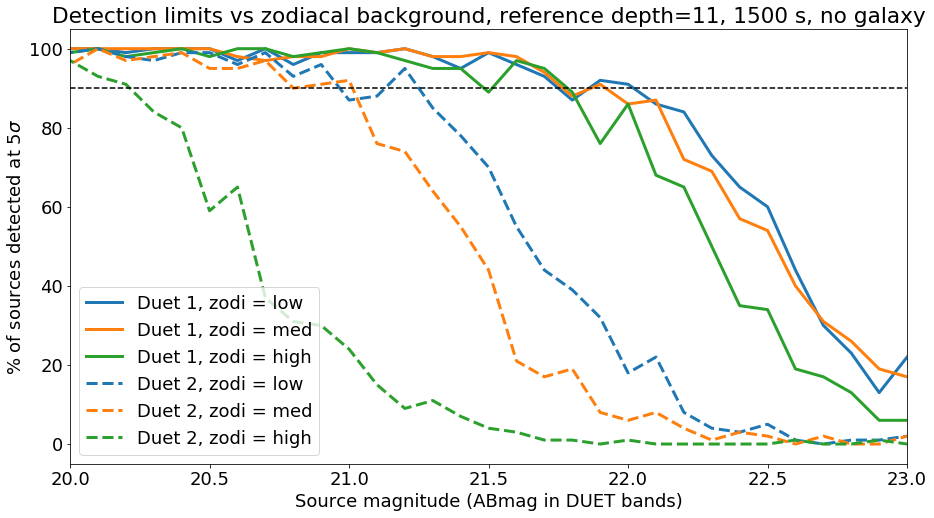

In [7]:
for i, zodi in enumerate(['low', 'med', 'high']):
    ind = ((res['ref_depth']== 11) & (res['band'] == 1) & (res['stack']==5) & (res['zodi'] == zodi) & (res['gal'] == 'none'))
    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle='-', 
             color=plotcolors[i], label='Duet 1, zodi = '+zodi)
    
for i, zodi in enumerate(['low', 'med', 'high']):
    ind = ((res['ref_depth']== 11) & (res['band'] == 2) & (res['stack']==5) & (res['zodi'] == zodi) & (res['gal'] == 'none'))
    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle='--', 
             color=plotcolors[i], label='Duet 2, zodi = '+zodi)

#for i, zodi in enumerate(['low', 'med', 'high']):
#    ind = ((res['ref_depth']== 7) & (res['band'] == 3) & (res['stack']==1) & (res['zodi'] == zodi) & (res['gal'] == 'none'))
#    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle=':', 
#             color=plotcolors[i], label='Combined, zodi = '+zodi)
   
plt.axhline(y=90, xmin=0, xmax=1, linestyle='--', color='black', linewidth=1.5)
plt.legend()
plt.xlim(20, 23)
plt.xlabel('Source magnitude (ABmag in DUET bands)')
plt.ylabel(r'% of sources detected at 5$\sigma$')
plt.title('Detection limits vs zodiacal background, reference depth=11, 1500 s, no galaxy')
plt.show()

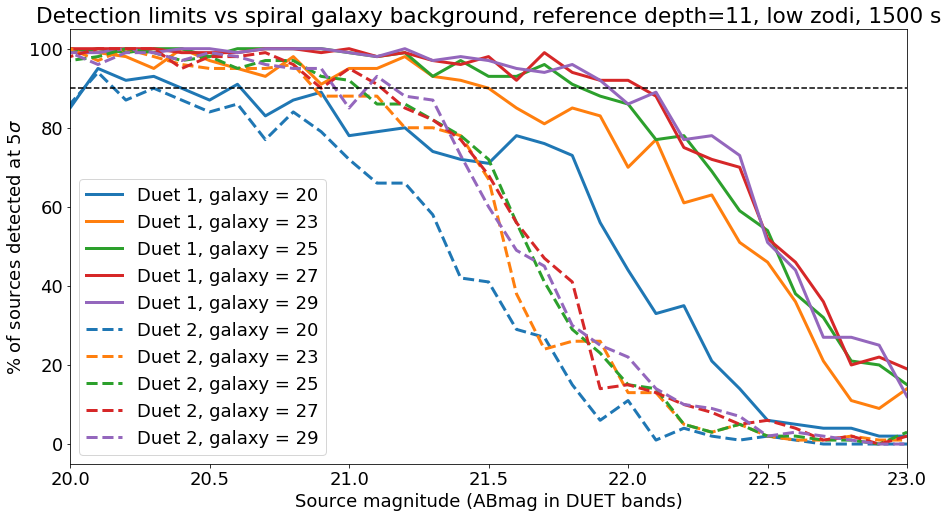

In [8]:
for i, galmag in enumerate([20,23,25,27,29]):
    ind = ((res['ref_depth']== 11) & (res['band'] == 1) & (res['stack']==5) & (res['zodi'] == 'low') & (res['gal'] == 'spiral') & (res['galmag'] == galmag))
    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle='-', 
             color=plotcolors[i], label='Duet 1, galaxy = '+str(galmag))
    
for i, galmag in enumerate([20,23,25,27,29]):
    ind = ((res['ref_depth']== 11) & (res['band'] == 2) & (res['stack']==5) & (res['zodi'] == 'low') & (res['gal'] == 'spiral') & (res['galmag'] == galmag))
    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle='--', 
             color=plotcolors[i], label='Duet 2, galaxy = '+str(galmag))

#for i, zodi in enumerate(['low', 'med', 'high']):
#    ind = ((res['ref_depth']== 7) & (res['band'] == 3) & (res['stack']==1) & (res['zodi'] == zodi) & (res['gal'] == 'none'))
#    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle=':', 
#             color=plotcolors[i], label='Combined, zodi = '+zodi)
   
plt.axhline(y=90, xmin=0, xmax=1, linestyle='--', color='black', linewidth=1.5)
plt.legend()
plt.xlim(20, 23)
plt.xlabel('Source magnitude (ABmag in DUET bands)')
plt.ylabel(r'% of sources detected at 5$\sigma$')
plt.title('Detection limits vs spiral galaxy background, reference depth=11, low zodi, 1500 s')
plt.show()

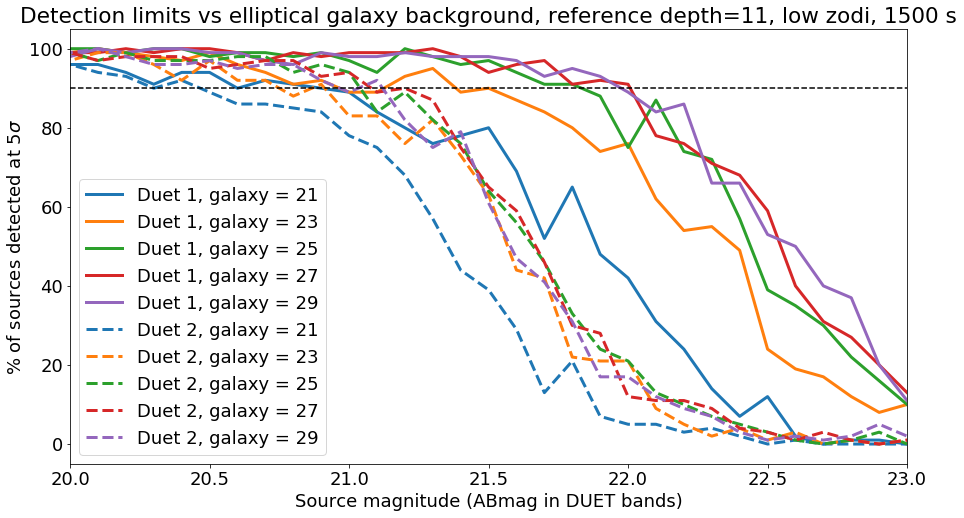

In [9]:
for i, galmag in enumerate([21,23,25,27,29]):
    ind = ((res['ref_depth']== 11) & (res['band'] == 1) & (res['stack']==5) & (res['zodi'] == 'low') & (res['gal'] == 'elliptical') & (res['galmag'] == galmag))
    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle='-', 
             color=plotcolors[i], label='Duet 1, galaxy = '+str(galmag))
    
for i, galmag in enumerate([21,23,25,27,29]):
    ind = ((res['ref_depth']== 11) & (res['band'] == 2) & (res['stack']==5) & (res['zodi'] == 'low') & (res['gal'] == 'elliptical') & (res['galmag'] == galmag))
    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle='--', 
             color=plotcolors[i], label='Duet 2, galaxy = '+str(galmag))

#for i, zodi in enumerate(['low', 'med', 'high']):
#    ind = ((res['ref_depth']== 7) & (res['band'] == 3) & (res['stack']==1) & (res['zodi'] == zodi) & (res['gal'] == 'none'))
#    plt.plot(res['srcmag'][ind],res['detected'][ind], linewidth=3, linestyle=':', 
#             color=plotcolors[i], label='Combined, zodi = '+zodi)
   
plt.axhline(y=90, xmin=0, xmax=1, linestyle='--', color='black', linewidth=1.5)
plt.legend()
plt.xlim(20, 23)
plt.xlabel('Source magnitude (ABmag in DUET bands)')
plt.ylabel(r'% of sources detected at 5$\sigma$')
plt.title('Detection limits vs elliptical galaxy background, reference depth=11, low zodi, 1500 s')
plt.show()

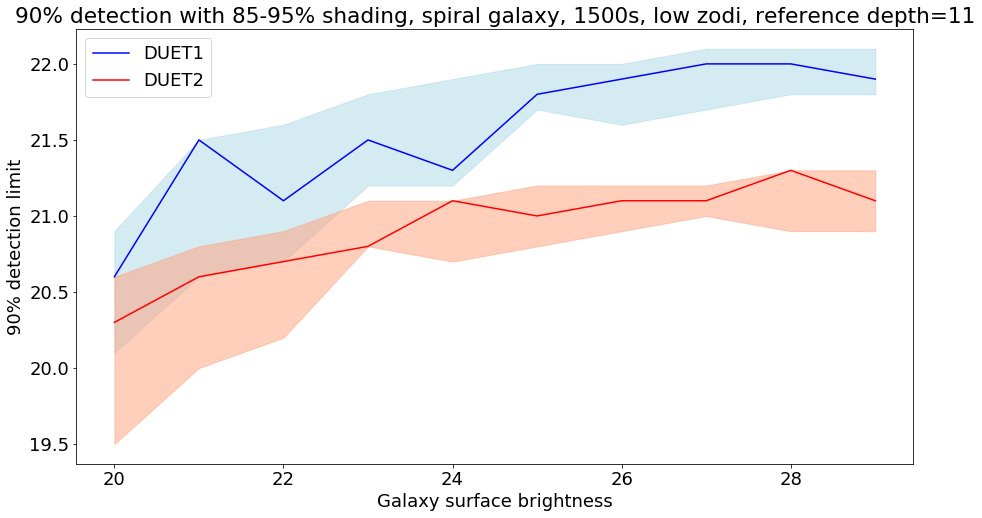

In [10]:
ind1 = ((lims['gal'] == 'spiral') & (lims['band'] == 1) & (lims['stack'] == 5) & (lims['zodi'] == 'low'))
plt.fill_between(lims['galmag'][ind1], lims['lim95'][ind1], lims['lim85'][ind1],
                color = 'lightblue', alpha=0.5)
plt.plot(lims['galmag'][ind1], lims['lim90'][ind1], color='blue', label='DUET1')

ind2 = ((lims['gal'] == 'spiral') & (lims['band'] == 2) & (lims['stack'] == 5) & (lims['zodi'] == 'low'))
plt.fill_between(lims['galmag'][ind2], lims['lim95'][ind2], lims['lim85'][ind2],
                color = 'lightsalmon', alpha=0.5)
plt.plot(lims['galmag'][ind2], lims['lim90'][ind2], color='red', label='DUET2')

plt.legend()
plt.xlabel('Galaxy surface brightness')
plt.ylabel('90% detection limit')
plt.title('90% detection with 85-95% shading, spiral galaxy, 1500s, low zodi, reference depth=11')
plt.show()

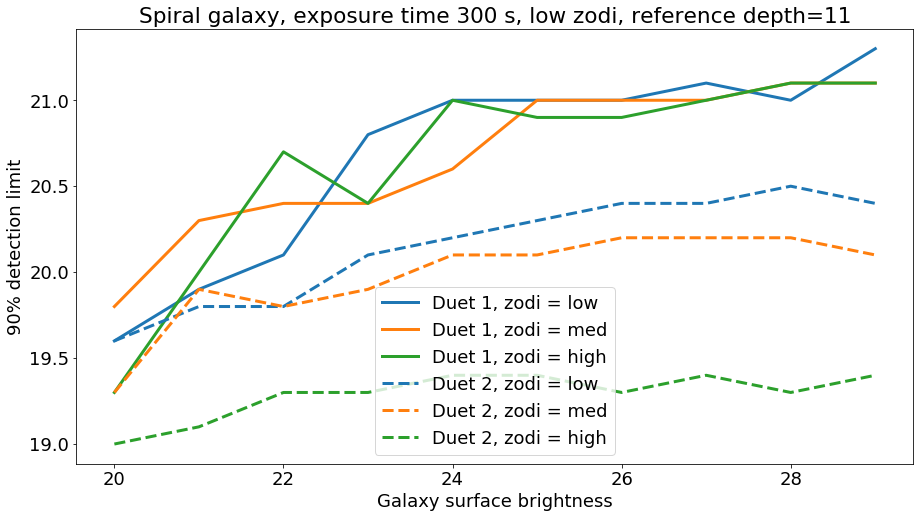

In [11]:
for i, zodi in enumerate(['low', 'med', 'high']):
    ind = ((lims['gal'] == 'spiral') & (lims['band'] == 1) & (lims['stack'] == 1) & (lims['zodi'] == zodi))
    plt.plot(lims['galmag'][ind], lims['lim90'][ind], linewidth=3, linestyle='-', 
             color=plotcolors[i], label='Duet 1, zodi = '+zodi)
    
for i, zodi in enumerate(['low', 'med', 'high']):
    ind = ((lims['gal'] == 'spiral') & (lims['band'] == 2) & (lims['stack'] == 1) & (lims['zodi'] == zodi))
    plt.plot(lims['galmag'][ind], lims['lim90'][ind], linewidth=3, linestyle='--', 
             color=plotcolors[i], label='Duet 2, zodi = '+zodi)

plt.legend()
plt.xlabel('Galaxy surface brightness')
plt.ylabel('90% detection limit')
plt.title('Spiral galaxy, exposure time 300 s, low zodi, reference depth=11')
plt.show()

In [23]:
lims[(lims['gal'] == 'elliptical') & (lims['zodi'] == 'high') & (lims['galmag'] == 25)]

FITS_rec([('elliptical', 25., 1,  1, 'high', 20.8, 20.8, 20.3),
          ('elliptical', 25., 2,  1, 'high', 19.5, 19.4, 19.4),
          ('elliptical', 25., 1,  5, 'high', 21.8, 21.6, 21.3),
          ('elliptical', 25., 2,  5, 'high', 20.2, 20.2, 19.8),
          ('elliptical', 25., 1, 10, 'high', 22.1, 21.9, 21.7),
          ('elliptical', 25., 2, 10, 'high', 20.5, 20.4, 20.3)],
         dtype=(numpy.record, [('gal', 'S32'), ('galmag', '>f8'), ('band', '>i8'), ('stack', '>i8'), ('zodi', 'S32'), ('lim85', '>f8'), ('lim90', '>f8'), ('lim95', '>f8')]))